**STEP 1 : Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd

# Load fake news dataset
with open('/content/drive/MyDrive/NLP Mini Project/fake_news-all.json') as f:
    fake_news = json.load(f)
    fake_news_df = pd.json_normalize(fake_news, 'fake_news')  # Ensure 'fake_news' is the correct key

# Load true news dataset
with open('/content/drive/MyDrive/NLP Mini Project/true_news_all_dirty.json') as f:
    true_news = json.load(f)
    true_news_df = pd.json_normalize(true_news, 'true_news')  # Ensure 'true_news' is the correct key

# Add labels (1 = True News, 0 = Fake News)
fake_news_df["label"] = 0
true_news_df["label"] = 1

# Merge both datasets
df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

print(df.head())
print(df.info())

                                                 url  \
0  https://hindi.boomlive.in/fact-check/imran-kha...   
1  https://hindi.boomlive.in/fact-check/hindi-imp...   
2  https://hindi.boomlive.in/fact-check/pm-narend...   
3  https://hindi.boomlive.in/fact-check/rajnath-s...   
4  https://hindi.boomlive.in/fact-check/balakot-s...   

                                   short_description  \
0  बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...   
1  सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...   
2  सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...   
3  दावा है कि भाजपा के नेताओं ने माना है कि सरकार...   
4  मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...   

                                          full_title  \
0  इमरान खान के क्रॉप्ड वीडियो का दावा- भारत में ...   
1  हिंदी में लिखे साइन बोर्ड पर कालिख पोतने की ये...   
2  जनसंख्या नियंत्रण क़ानून के दावे के साथ पीएम मो...   
3  राजनाथ सिंह का दो साल पुराना वीडियो फिर हुआ वायरल   
4  ए.एन.आई, अन्य मीडिया संस्थानों ने बालाकोट प

**Section 2: Perform Exploratory Data Analysis (EDA)**

                                                 url  \
0  https://hindi.boomlive.in/fact-check/imran-kha...   
1  https://hindi.boomlive.in/fact-check/hindi-imp...   
2  https://hindi.boomlive.in/fact-check/pm-narend...   
3  https://hindi.boomlive.in/fact-check/rajnath-s...   
4  https://hindi.boomlive.in/fact-check/balakot-s...   

                                   short_description  \
0  बूम ने पाया कि इमरान खान भारत सरकार की आलोचना ...   
1  सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...   
2  सोशल मीडिया प्लेटफ़ॉर्म फ़ेसबुक और ट्विटर पर इस ...   
3  दावा है कि भाजपा के नेताओं ने माना है कि सरकार...   
4  मीडिया आउटलेट्स और वायर एजेंसी ने गलत तरीके से...   

                                          full_title  \
0  इमरान खान के क्रॉप्ड वीडियो का दावा- भारत में ...   
1  हिंदी में लिखे साइन बोर्ड पर कालिख पोतने की ये...   
2  जनसंख्या नियंत्रण क़ानून के दावे के साथ पीएम मो...   
3  राजनाथ सिंह का दो साल पुराना वीडियो फिर हुआ वायरल   
4  ए.एन.आई, अन्य मीडिया संस्थानों ने बालाकोट प

<ipython-input-53-3d4f1c83d0e1>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette='coolwarm')


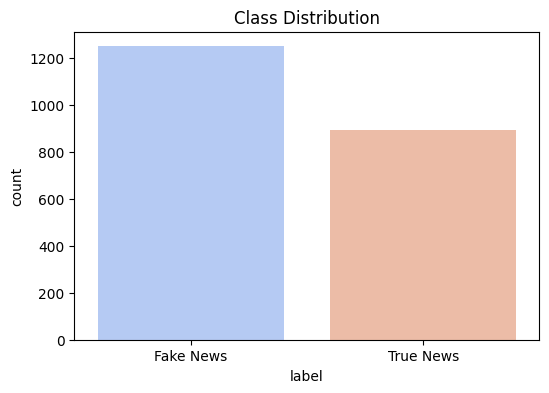

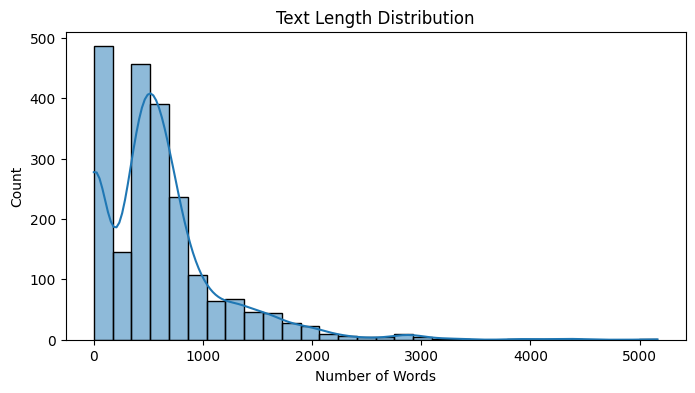


Text Length Statistics:
 count    2143.000000
mean      598.556696
std       567.414735
min         0.000000
25%       271.500000
50%       510.000000
75%       755.500000
max      5164.000000
Name: text_length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


print(df.head())

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())


text_columns = ["long_description", "short_description", "full_title", "short_desc"]
for col in text_columns:
    print(f"\nSample values from {col}:")
    print(df[col].dropna().head())

# Selecting 'long_description' as the primary text column (modify if needed)
df["text"] = df["long_description"].fillna("")

# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["label"], palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Fake News', 'True News'])
plt.title("Class Distribution")
plt.show()

# Analyzing text lengths (number of words per news article)
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

# Plotting text length distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()

# Displaying basic statistics of text length
print("\nText Length Statistics:\n", df["text_length"].describe())


**Section 3: Perform Text Processing on Dataset**

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('punkt_tab')

# Full Hindi stopwords list
hindi_stopwords = set([
    'अत', 'यह', 'है', 'कि', 'को', 'के', 'हुई', 'वह', 'हुआ', 'पर', 'नहीं', 'साथ', 'में', 'से', 'कर', 'रहा', 'है',
    'यहां', 'भी', 'उस', 'और', 'किया', 'था', 'जब', 'तथा', 'यह', 'होगा', 'लिए', 'लेकिन', 'आप', 'हो', 'की', 'ने',
    'जिन्हें', 'तक', 'चाहिए', 'किस', 'कैसे', 'उन', 'मुझे', 'सब', 'एक', 'जैसा', 'वहीं', 'क्या', 'अंदर', 'अदि',
    'अप', 'अपना', 'अपनि', 'अपनी', 'अपने', 'अभि', 'अभी', 'आदि', 'आप', 'इंहिं', 'इंहें', 'इंहों', 'इतयादि', 'इत्यादि',
    'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकि', 'इसकी', 'इसके', 'इसमें', 'इसि', 'इसी', 'इसे',
    'उंहिं', 'उंहें', 'उंहों', 'उन', 'उनका', 'उनकि', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस',
    'उसके', 'उसि', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'एसे', 'ऐसे', 'ओर', 'और', 'कइ', 'कई', 'कर', 'करता', 'करते',
    'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफि', 'काफ़ी', 'कि', 'किंहें', 'किंहों', 'कितना', 'किन्हें',
    'किन्हों', 'किया', 'किर', 'किस', 'किसि', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोइ', 'कोई', 'कोन',
    'कोनसा', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जहां', 'जा', 'जिंहें', 'जिंहों', 'जितना', 'जिधर', 'जिन',
    'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जेसा', 'जेसे', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिंहें',
    'तिंहों', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थि', 'थी', 'थे', 'दबारा', 'दवारा', 'दिया',
    'दुसरा', 'दुसरे', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहिं', 'नहीं', 'ना', 'निचे', 'निहायत', 'नीचे', 'ने', 'पर',
    'पहले', 'पुरा', 'पूरा', 'पे', 'फिर', 'बनि', 'बनी', 'बहि', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भि', 'भितर',
    'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यहां', 'यहि', 'यही', 'या', 'यिह', 'ये', 'रखें',
    'रवासा', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वगेरह', 'वरग', 'वर्ग', 'वह', 'वहाँ', 'वहां',
    'वहिं', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभि', 'सभी', 'साथ', 'साबुत', 'साभ',
    'सारा', 'से', 'सो', 'हि', 'ही', 'हुअ', 'हुआ', 'हुइ', 'हुई', 'हुए', 'हे', 'हें', 'है', 'हैं', 'हो', 'होता',
    'होति', 'होती', 'होते', 'होना', 'होने'
])

# Simple Hindi stemming function (manual rules)
def hindi_stemmer(word):
    suffixes = ["ता", "ती", "ते", "ना", "ने", "नी", "ओं", "एं", "यों", "ाऊं", "ाना", "ाना", "ाऊंगा", "ाऊंगी", "एगा", "एगी"]

    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Handle NaN or non-string values safely

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword Removal
    filtered_tokens = [word for word in tokens if word not in hindi_stopwords]

    # Stemming
    stemmed_tokens = [hindi_stemmer(word) for word in filtered_tokens]

    return " ".join(stemmed_tokens)

# Apply cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

# Show cleaned text samples
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  \
0  A video is viral with the claim that Pakistan ...   
1  सिख समुदाय के कुछ लोगों को हिंदी साइन बोर्ड पर...   
2  प्रधानमंत्री नरेंद्र मोदी की एक़ तस्वीर सोशल मी...   
3                                                      
4  न्यूज़ संस्थान एशियन न्यूज़ इंटरनेशनल के साथ साथ...   

                                        cleaned_text  
0  a video is viral with the claim that pakistan ...  
1  सख समदय क कछ लग क हद सइन बरड कलख पतत दखत तसवर ...  
2  परधनमतर नरदर मद क एक़ तसवर सशल मडय ख़ब वयरल ह तस...  
3                                                     
4  नयज़ ससथन एशयन नयज़ इटरनशनल क सथ सथ मखय धर क मडय...  


**Section 4: Generate NLP-Based Features**

In [ ]:
import numpy as np

def generate_nlp_features(df):
    df['char_count'] = df['cleaned_text'].apply(len)
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x else 0)
    return df

# Generate features
df = generate_nlp_features(df)


print(df[['char_count', 'word_count', 'avg_word_length']].head())


   char_count  word_count  avg_word_length
0         147          28         4.285714
1        2336         633         2.691943
2        1517         406         2.738916
3           0           0         0.000000
4        2787         699         2.988555


**Section 5: Feature Extraction**

In [ ]:
pip install fasttext


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display shape of TF-IDF matrix
print("TF-IDF Matrix Shape:", X_tfidf.shape)

# # Display top feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nTop 10 features:")
print(feature_names[:10])

import pandas as pd
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
print("\nPreview of TF-IDF matrix (first 5 rows):")
print(tfidf_df.head())  # Display first 5 rows of the matrix


KeyboardInterrupt: 

**Section 6: Train Supervised Models on NLP-Based Features**

In [ ]:
from sklearn.model_selection import train_test_split

# Extract features and labels
X = X_tfidf
y = df['label']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the training and test set sizes
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Show class distribution in both training and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts())

print("\nClass distribution in test set:")
print(y_test.value_counts())

# Preview a few samples from the training set
print("\nPreview of first 5 samples in the training set:")
print(X_train[:5].toarray())  # Convert sparse matrix to dense for display
print(y_train[:5])

# Preview a few samples from the test set
print("\nPreview of first 5 samples in the test set:")
print(X_test[:5].toarray())  # Convert sparse matrix to dense for display
print(y_test[:5])


Training set size: (1714, 5000), Test set size: (429, 5000)

Class distribution in training set:
label
0    1006
1     708
Name: count, dtype: int64

Class distribution in test set:
label
0    244
1    185
Name: count, dtype: int64

Preview of first 5 samples in the training set:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.03944791 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
905     0
1699    1
2101    1
305     0
986     0
Name: label, dtype: int64

Preview of first 5 samples in the test set:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
350     0
2056    1
686     0
602     0
571     0
Name: label, dtype: int64


**Sections 7: Train Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9907
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       244
           1       0.98      1.00      0.99       185

    accuracy                           0.99       429
   macro avg       0.99      0.99      0.99       429
weighted avg       0.99      0.99      0.99       429



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nb_model = MultinomialNB()

# Train models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

# Evaluate models
print("SVM Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))

print("\nRandom Forest Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

print("\nNaive Bayes Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

SVM Model Performance
Accuracy: 0.9953
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       244
           1       0.99      1.00      0.99       185

    accuracy                           1.00       429
   macro avg       0.99      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Random Forest Model Performance
Accuracy: 0.9953
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       244
           1       0.99      1.00      0.99       185

    accuracy                           1.00       429
   macro avg       0.99      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


Naive Bayes Model Performance
Accuracy: 0.7809
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       244
           1       0.99      0.50      0.66       185

    accuracy                           0.78  

**Sections 8 : Hyperparameter training**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Different kernel options
    'gamma': ['scale', 'auto']  # Only used for 'rbf' kernel
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best Accuracy for SVM: {grid_search_svm.best_score_:.4f}")

# Use the best SVM model
best_model = grid_search_svm.best_estimator_


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy for SVM: 0.9959


**Sections 9 : Model Evaluation using Different Metrics**

Precision: 0.9893
Recall: 1.0000
F1 Score: 0.9946


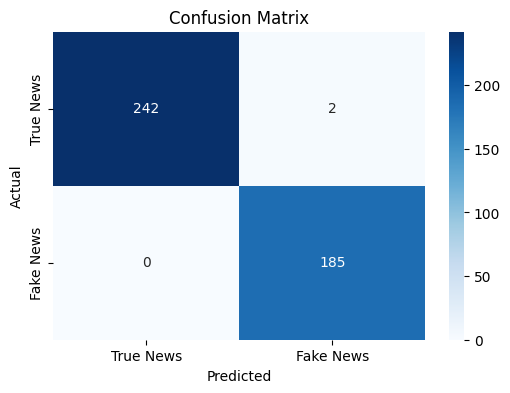

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

best_model = svm_model

# Predictions using the best model
y_pred_best = best_model.predict(X_test)

# Compute evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

# Display results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['True News', 'Fake News'], yticklabels=['True News', 'Fake News'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Section 10: Save and Load the Model**

In [ ]:
import pickle

# Save the model
with open("fake_news_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [ ]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'text_classification_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

**Section 11: Save the Model and Make Predictions**

In [ ]:
# Load the saved model and vectorizer
loaded_model = joblib.load('text_classification_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_news(model, vectorizer):
    # Get user input
    news_text = input("Enter a news article in Hindi: ")

    # Preprocess the text
    cleaned_news = clean_text(news_text)

    # Convert to TF-IDF
    transformed_news = vectorizer.transform([cleaned_news])

    # Predict
    prediction = model.predict(transformed_news)[0]

    # Print the result
    result = "🟥 Fake News" if prediction == 1 else "🟩 Real News"
    print(f"\nPrediction: {result}")

# Call the function for user input
predict_news(loaded_model, loaded_vectorizer)


Enter a news article in Hindi: संयुक्त राष्ट्र ने सूडान में मानवीय संकट पर चेतावनी दी, संघर्ष के कारण लाखों लोग विस्थापित।

Prediction: 🟩 Real News


In [ ]:
# Load the saved model and vectorizer
loaded_model = joblib.load('text_classification_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

def predict_news(model, vectorizer):
    # Get user input
    news_text = input("Enter a news article in Hindi: ")

    # Preprocess the text
    cleaned_news = clean_text(news_text)

    # Convert to TF-IDF
    transformed_news = vectorizer.transform([cleaned_news])

    # Predict
    prediction = model.predict(transformed_news)[0]

    # Print the result
    result = "🟥 Fake News" if prediction == 1 else "🟩 Real News"
    print(f"\nPrediction: {result}")

# Call the function for user input
predict_news(loaded_model, loaded_vectorizer)


Enter a news article in Hindi: "विपक्षी कांग्रेस पार्टी ने सरकार से स्थिति स्पष्ट करने को कहा है, दूसरी ओर सरकार का कहना है कि स्थिति पर उसकी नज़र है."

Prediction: 🟥 Fake News
